# Laboratorul 8

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [68]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

## Exercițiul 1

 Scrieți câte o funcție prin care să construiți o **fereastră    dreptunghiulară**, respectiv o **fereastră de tip Hanning**. Funcțiile primesc ca parametru **lungimea ferestrei**.

 Generați și afișați o sinusoidă cu frecvență $f = 100 \, \text{Hz}$, amplitudine unitară și fază nulă, apoi treceți-o prin cele două tipuri de ferestre (pentru lungimea $N_w = 200$) și afișați grafic rezultatul.

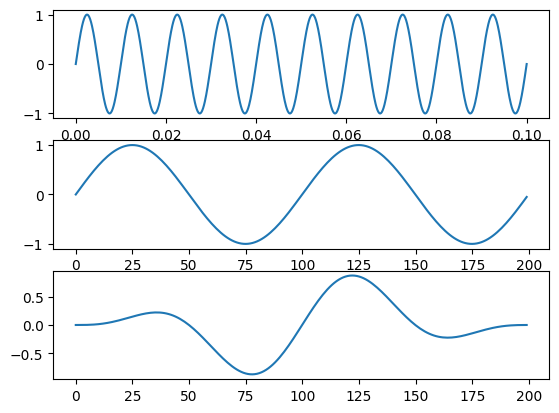

In [69]:
def construieste_fereastra_dreptunghiulara(lungime):
    return np.ones(lungime)

def construieste_fereastra_hanning(lungime):
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(0, lungime, 1) / lungime))

fereastra_dreptunghiulara = construieste_fereastra_dreptunghiulara(200)
fereastra_hanning = construieste_fereastra_hanning(200)

timp = np.linspace(0, 0.1, 1000)

semnal = np.sin(2 * np.pi * 100 * timp)

fig, axes = plt.subplots(3, 1)

axes[0].plot(timp, semnal)
axes[1].plot(semnal[:200] * fereastra_dreptunghiulara)
axes[2].plot(semnal[:200] * fereastra_hanning)

plt.show()

## Exercițiul 2

Fișierul `traffic-one-week.csv` conține date de trafic colectate pe o perioadă de o săptămână. Perioada de eșantionare este de o oră, iar valorile măsurate reprezintă numărul de vehicule care trec printr-o intersecție.

### Subpunctul a)

Încărcați datele în memorie și selectați din semnalul dat o porțiune corespunzătoare pentru **3 zile**, `x`, pe care veți lucra în continuare.

In [70]:
date_trafic = np.genfromtxt("traffic-one-week.csv")

index_start = 10

x = date_trafic[index_start:index_start + 3 * 24]
x

array([20., 38., 22., 18., 16., 14., 18., 10.,  2.,  2.,  4.,  6.,  4.,
        4.,  8.,  8.,  4.,  4.,  4.,  2.,  2.,  6.,  4.,  6.,  8., 10.,
        2.,  2., 14.,  6.,  6.,  6.,  6.,  6.,  4.,  4.,  4.,  4., 16.,
       16., 46., 34., 20., 26., 14.,  8., 18., 20., 12., 28.,  8., 10.,
       16., 10.,  4.,  4.,  4.,  2.,  4.,  6.,  4.,  6.,  6.,  2.,  6.,
        6., 12.,  4.,  8., 22.,  6.,  6.])

### Subpunctul b)

Utilizați funcția `np.convolve(x, np.ones(w), 'valid') / w` pentru a realiza un filtru de tip medie alunecătoare și neteziți semnalul obținut anterior. Setați dimensiuni diferite ale ferestrei (variabila `w` în codul de mai sus), spre exemplu $5$, $9$, $13$, $17$. Afișați grafic semnalele obținute.

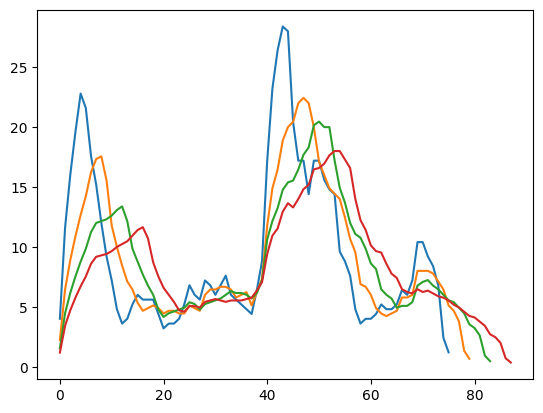

In [71]:
for w in (5, 9, 13, 17):
    x_netezit = np.convolve(x, np.ones(w)) / w
    plt.plot(x_netezit)
plt.show()

### Subpunctul c)

Dorinți să filtrați **zgomotul** (frecvențe înalte) din semnalul cu date de trafic. Alegeți o **frecvență de tăiere** pentru un filtru trece-jos pe care îl veți crea în subpunctul următor. Argumentați alegerea făcută.

**Indicație:** transformata Fourier a semnalului, calculată în laboratorul anterior, ar putea să vă ajute cu luarea acestei decizii.

Pe lângă valoarea frecvenței în Herzi, determinați și valoarea ei normalizată între 0 și 1, unde 1 reprezintă frecvența Nyquist pentru semnalul de trafic.

Frecvență de tăiere: 4.1666666666666665e-05 Hz


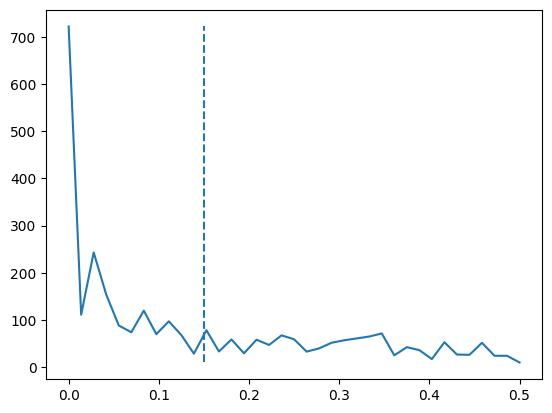

In [72]:
# Uitându-ne pe transformata Fourier, putem vedea că de la această frecvență încolo
# componentele par să aibă amplitudini relativ mici (probabil sunt zgomot).

frecventa_taiere_normalizata = 0.15
frecventa_esantionare = 1 / 3600
frecventa_taiere = frecventa_esantionare * frecventa_taiere_normalizata
print("Frecvență de tăiere:", frecventa_taiere, "Hz")

def afisare_transformata_fourier(semnal):
    X = np.fft.rfft(semnal)
    freqs = np.fft.rfftfreq(len(semnal))
    X = np.abs(X)

    plt.plot(freqs, X)
    plt.vlines(frecventa_taiere_normalizata, min(X), max(X), linestyles='dashed')
    plt.show()

afisare_transformata_fourier(x)

### Subpunctul d)

Utilizați funcția `scipy.signal.butter`, respectiv funcția `scipy.signal.cheby1`, pentru a **proiecta** filtrele Butterworth și Chebyshev de ordin 5, cu frecvența de tăiere $W_n$ (valoare normalizată), stabilită la subpunctul anterior.
        
Pentru început, setați atenuarea ondulațiilor la `rp = 5` (dB), urmând ca apoi să încercați și alte valori.

In [73]:
butter = scipy.signal.butter(N=5, Wn=frecventa_taiere_normalizata, btype='low')
cheby = scipy.signal.cheby1(N=5, rp=5, Wn=frecventa_taiere_normalizata, btype='low')

### Subpunctul e)

**Filtrați** datele de trafic cu cele 2 filtre și afișați semnalele filtrate împreună cu datele brute. Ce filtru alegeți dintre cele două și de ce?

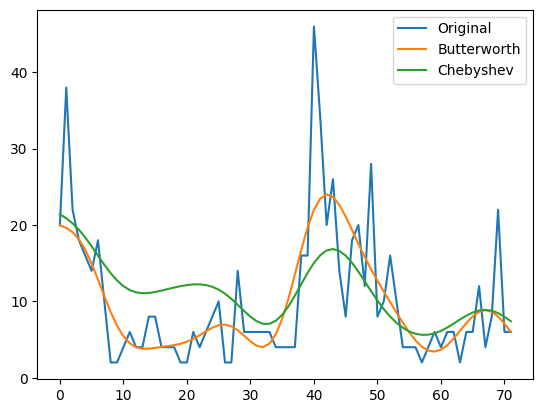

In [74]:
plt.plot(x, label='Original')

x_filtrat_butter = scipy.signal.filtfilt(butter[0], butter[1], x)
plt.plot(x_filtrat_butter, label='Butterworth')

x_filtrat_cheby = scipy.signal.filtfilt(cheby[0], cheby[1], x)
plt.plot(x_filtrat_cheby, label='Chebyshev')

plt.legend()
plt.show()

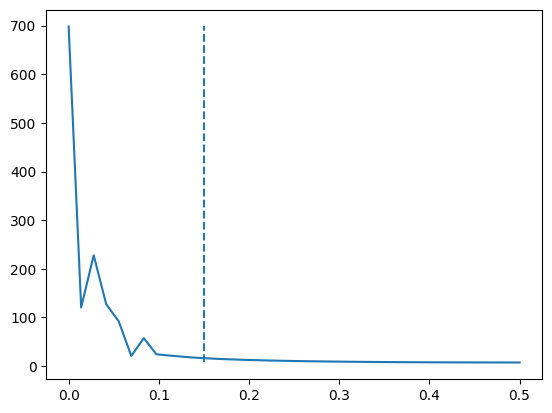

In [75]:
afisare_transformata_fourier(x_filtrat_butter)

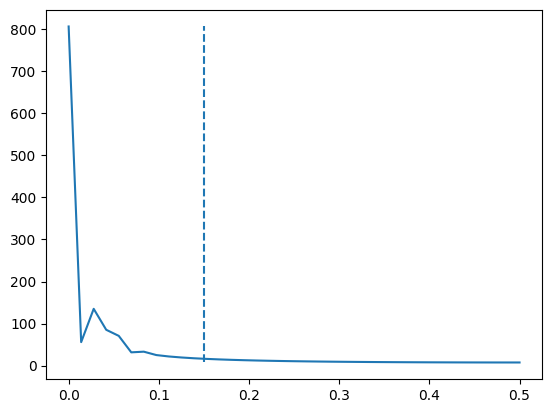

In [76]:
afisare_transformata_fourier(x_filtrat_cheby)

### Subpunctul f)

Reproiectați filtrele alegând atât un ordin mai mic, cât și unul mai mare. De asemenea, reproiectați filtrul Chebyshev cu alte valori ale `rp` și observați efectul.

Stabiliți **valorile optime** ale parametrilor pentru a vă atinge scopul (cel de a filtra zgomotul din semnal).

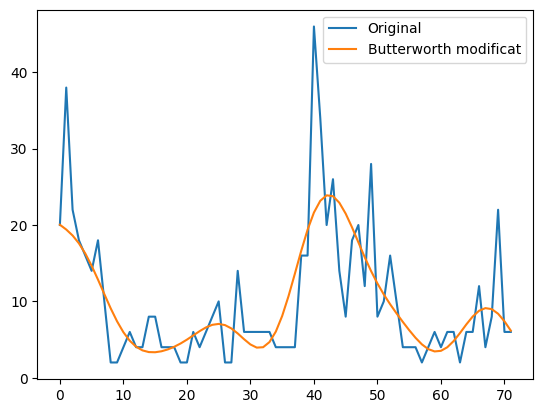

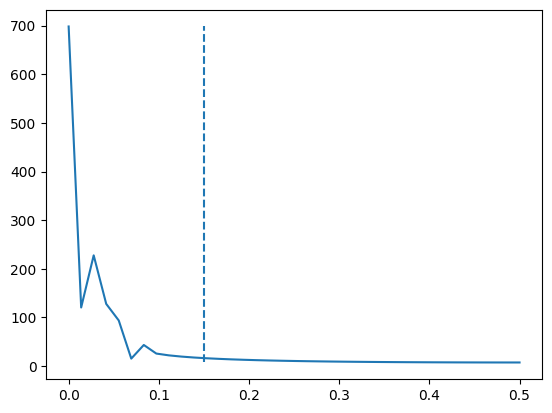

In [77]:
plt.plot(x, label='Original')

butter = scipy.signal.butter(N=11, Wn=frecventa_taiere_normalizata, btype='low')
x_filtrat_butter = scipy.signal.filtfilt(butter[0], butter[1], x)
plt.plot(x_filtrat_butter, label='Butterworth modificat')

plt.legend()
plt.show()

afisare_transformata_fourier(x_filtrat_butter)

Am obținut niște rezultate mai bune folosind un filtru Chebyshev, cu un ordin și cu `rp` mai mici, dar cu frecvența de tăiere puțin crescută:

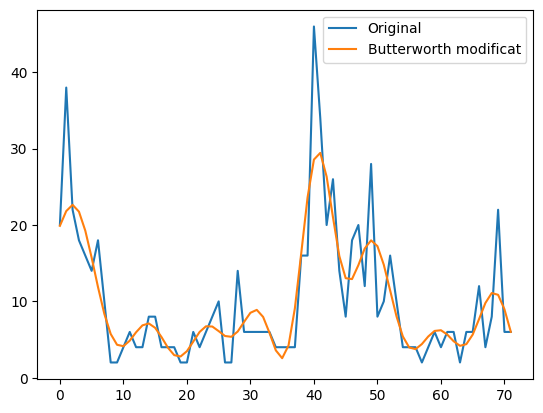

In [78]:
plt.plot(x, label='Original')

cheby = scipy.signal.cheby1(N=3, rp=1, Wn=frecventa_taiere_normalizata*1.6, btype='low')
x_filtrat_cheby = scipy.signal.filtfilt(cheby[0], cheby[1], x)
plt.plot(x_filtrat_cheby, label='Butterworth modificat')

plt.legend()
plt.show()

Se vede pe transformata Fourier că frecvențele sunt aproape neschimbate până la frecvența prag, iar apoi descresc rapid:

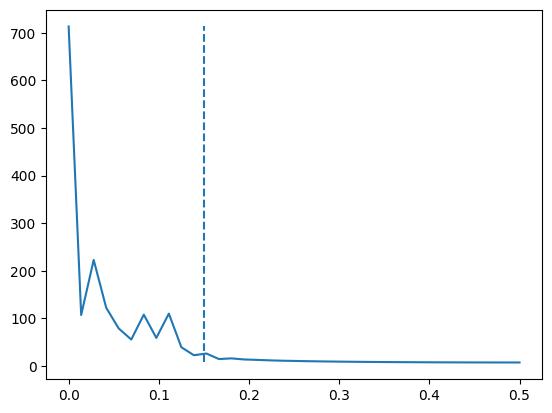

In [79]:
afisare_transformata_fourier(x_filtrat_cheby)